<div class="alert alert-block alert-info">
    <p><img src="https://geekbrains.ru/apple-touch-icon-57x57.png" align="right" alt="GeekBrains"></p>
    <p style="color:DarkSlateGray"><b>Course:</b> Probability Theory and Math Statistics</p>
    <p style="color:DarkSlateGray"><b>Project:</b> Research of happiness indicators by countries</p>
    <p style="color:DarkSlateGray"><b>Supervisor:</b> Yury Lytkin</p>
    <p style="color:DarkSlateGray"><b>Author:</b> Dmitry Doni</p>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Display charts in Jupyter Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
# Display inline plots as SVG
%config InlineBackend.figure_formats = ['svg']
# Set the limit of columns displayed in the notebook
pd.options.display.max_columns = 100

### Raw Data Analysis

__Brief description of the dataset__  
The dataset contains the following features:  
* _Country (Region)_: country name
* _Ladder_: target variable, identifies the position of a country in the list
* _SD of Ladder_: standard deviation of ladder by country-year
* _Positive affect_: defined as the average of three positive affect measures in GWP: happiness, laugh, enjoyment
* _Negative affect_: defined as the average of three negative affect measures in GWP: worry, sadness, anger
* _Social support_: also "having someone to count on in times of trouble", the national average of the binary responses (either 0 or 1) to the GWP question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”
* _Freedom_: the national average of responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”
* _Corruption_: the measure is the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout the government or not?” and “Is corruption widespread within businesses or not?”
* _Generosity_: the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita
* _Log of GDP per capita_: GDP per capita (variable name gdp) in purchasing power parity (PPP), from World Development Indicators (WDI)
* _Healthy life expectancy_: the time series of healthy life expectancy at birth are calculated by the authors based on data from the World Health Organization (WHO), the World Development Indicators (WDI), and statistics published in journal articles

In [3]:
df = pd.read_csv('../../datasets/happiness.csv')

df.head(10).style.hide_index()\
    .bar(subset=["Positive affect", "Social support", "Freedom", "Generosity", "Log of GDP per capita", "Healthy life expectancy"], color='lightgreen')\
    .bar(subset=["Negative affect", "Corruption"], color='gray')\

Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Finland,1,4,41,10,2,5,4,47,22,27
Denmark,2,13,24,26,4,6,3,22,14,23
Norway,3,8,16,29,3,3,8,11,7,12
Iceland,4,9,3,3,1,7,45,3,15,13
Netherlands,5,1,12,25,15,19,12,7,12,18
Switzerland,6,11,44,21,13,11,7,16,8,4
Sweden,7,18,34,8,25,10,6,17,13,17
New Zealand,8,15,22,12,5,8,5,8,26,14
Canada,9,23,18,49,20,9,11,14,19,8
Austria,10,10,64,24,31,26,19,25,16,15


In [4]:
df.shape

(156, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [6]:
df.describe()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
count,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000
mean,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
std,45.177428,45.177428,44.888751,44.888751,44.888751,44.888751,42.868014,44.888751,44.022721,43.445368
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,39.750000,39.750000,39.500000,39.500000,39.500000,39.500000,37.750000,39.500000,38.750000,38.250000
50%,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
75%,117.250000,117.250000,116.500000,116.500000,116.500000,116.500000,111.250000,116.500000,114.250000,112.750000
max,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


### Correlation Analysis

#### Correlation

In [7]:
df[["Ladder", "Positive affect", "Negative affect", "Social support", "Freedom", "Corruption", "Generosity"]].corr()

,Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity
Ladder,1.000000,0.491432,0.523643,0.817842,0.546777,0.190071,0.497856
Positive affect,0.491432,1.000000,0.389697,0.386269,0.681770,0.209659,0.354877
Negative affect,0.523643,0.389697,1.000000,0.621888,0.430241,0.158903,0.338226
Social support,0.817842,0.386269,0.621888,1.000000,0.448903,0.118434,0.442432
Freedom,0.546777,0.681770,0.430241,0.448903,1.000000,0.381304,0.489991
Corruption,0.190071,0.209659,0.158903,0.118434,0.381304,1.000000,0.266138
Generosity,0.497856,0.354877,0.338226,0.442432,0.489991,0.266138,1.000000


#### Covariance

Unbiased covariance:
$$\sigma_{xy} = \dfrac{1}{n - 1} \displaystyle\sum_{i = 1}^n (x_i - \overline{x}) \cdot (y_i - \overline{y}).$$

In [8]:
X = df["Social support"]
Y = df["Ladder"]

In [9]:
MX = X.mean()
MY = Y.mean()

# Calculate unbiased covariance using formula
cov = ((X - MX) * (Y - MY)).sum() / (X.shape[0] - 1)
cov

1646.7354838709678

#### Correlation coefficient

Pearson correlation coefficient:
$$r_{XY} = \dfrac{\operatorname{cov}(X, Y)}{\sigma_X \cdot \sigma_Y}.$$

In [10]:
# Calculate Pearson correlation coefficient using formula 
# By default, std returns unbiased standard deviation
corr = cov / (X.std() * Y.std())
corr

0.8120164291106637

#### Linear Regression

Coefficients of the linear regression equation:
$$b1 = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};$$

$$b0 = \overline{y} - b1 \cdot {\overline{x}}.$$

In [11]:
b1 = (np.mean(X * Y) - np.mean(X) * np.mean(Y)) / (np.mean(X ** 2) - np.mean(X) ** 2)
b1

0.8349875930521093

In [12]:
b0 = np.mean(Y) - b1 * np.mean(X)
b0

13.370967741935473

Linear regression equation with `b0` and `b1` coefficients:
$$y = 13.37 + 0.83 \cdot x$$

Text(0, 0.5, 'Ladder')

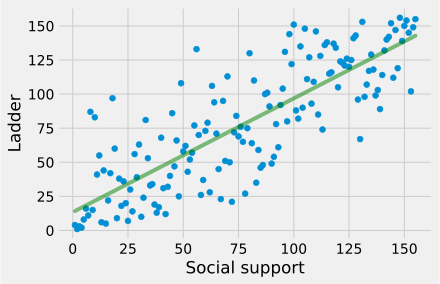

In [13]:
# Values (scatter plot) and linear regression function (green line)
ox = X
oy = b0 + b1 * ox

plt.scatter(X, Y)
plt.plot(ox, oy, color='green', alpha=0.5)

plt.xlabel("Social support")
plt.ylabel("Ladder")

R^2 (coefficient of determination) regression score:
$$R^2 = \dfrac{D_{model}}{D_y}$$
where `D_model` is the variance of predicted values, `D_y` is the variance of fact values.

In [14]:
# Get an array of predicted values and compare it with an array of fact values
y_pred = b0 + b1 * X

print(f'fact: \n{Y[:5]}')
print(f'pred: \n{y_pred[:5]}')

fact: 
0    1
1    2
2    3
3    4
4    5
Name: Ladder, dtype: int64
pred: 
0    15.040943
1    16.710918
2    15.875931
3    14.205955
4    25.895782
Name: Social support, dtype: float64


In [15]:
# Calculate R^2 score
R2 = y_pred.var() / Y.var()
R2

0.6883226973592228